In [70]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as sts
# import quandl
import os
import numpy as np
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [2]:
import quandl
from config import api_key

In [3]:
market_data = pd.read_csv('Final_Model_df.csv')

In [4]:
del market_data['Unnamed: 0']

In [5]:
market_data

,Date,SP500_Price,SP500_Return,20-day_Vol,50-day_Vol,100-day_Vol,21-day_MA,55-day_MA,100-day_MA,Nikkei,...,EM_High_Yield,EM Returns,EM_Bonds_20-day_Vol,EM_Bonds_50-day_Vol,EM_Bonds_100-day_Vol,EM_Bonds_21-day_MA,EM_Bonds_55-day_MA,EM_Bonds_100-day_MA,Value,Ted_Spread_Return
0,1999-01-04,1241.75,-0.007394,20.959995,19.480055,29.752237,1209.547619,1166.518182,1109.5925,13415.89,...,14.90,-0.001340,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0
1,1999-01-05,1266.00,0.019529,20.644222,19.577022,29.824555,1214.380952,1170.027273,1111.5025,13232.74,...,14.89,-0.000671,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0
2,1999-01-06,1295.00,0.022907,21.726881,20.070303,29.850770,1219.357143,1174.004545,1113.4725,13468.46,...,14.79,-0.006716,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0
3,1999-01-07,1281.25,-0.010618,22.107907,20.236138,29.805115,1223.166667,1177.631818,1115.1100,13536.56,...,14.78,-0.000676,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0
4,1999-01-08,1296.00,0.011512,22.273337,20.257133,29.824544,1227.976190,1181.509091,1116.9575,13391.81,...,14.82,0.002706,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4981,2020-06-26,2996.75,-0.020830,28.416577,27.258865,49.026207,3089.714286,2948.213636,2912.2775,22512.08,...,7.83,0.001279,23.611112,20.090238,48.020281,7.972857,9.064364,9.0479,0.2,0.0
4982,2020-06-29,3037.75,0.013681,28.823689,26.642608,49.045467,3090.000000,2953.036364,2909.3025,21995.04,...,7.86,0.003831,23.718372,19.625771,48.004380,7.934286,9.015273,9.0654,0.2,0.0
4983,2020-06-30,3080.00,0.013908,29.139672,26.241794,49.095461,3091.738095,2959.009091,2906.6475,22288.14,...,7.74,-0.015267,23.792253,19.210698,48.068243,7.894286,8.967273,9.0821,0.1,-0.5
4984,2020-07-01,3092.75,0.004140,28.776369,25.409556,49.092208,3093.035714,2963.690909,2904.3200,22121.73,...,7.72,-0.002584,21.650907,19.223600,48.073920,7.859048,8.919818,9.0986,0.2,1.0


In [6]:
SP500 = pd.read_csv('SP500.csv')

In [7]:
SP500 = pd.DataFrame({'Date':SP500['Date'],
                     'Open':SP500['Open'],
                     'Close':SP500['Last'] 
                     })

## Stdev, Returns, Correl and MA calculations

In [8]:
SP500['10day_MA'] = SP500['Close'].rolling(window=10).mean()
SP500['Log_Returns'] = np.log(SP500['Close']/SP500['Close'].shift(1))

# 10day Annualized Vol
SP500['10day_Vol'] = SP500['Log_Returns'].rolling(10).std() * np.sqrt(252) * 100

# Correlation between SP500 Close and 10 day Moving Average
SP500['10day_Correl'] = SP500['Close'].rolling(10).corr(SP500['10day_MA'])

In [9]:
SP500.fillna(0,inplace=True)
SP500.head(30)

,Date,Open,Close,10day_MA,Log_Returns,10day_Vol,10day_Correl
0,1997-09-09,943.50,944.00,0.000,0.000000,0.000000,0.000000
1,1997-09-10,942.75,925.00,0.000,-0.020332,0.000000,0.000000
2,1997-09-11,924.00,918.25,0.000,-0.007324,0.000000,0.000000
3,1997-09-12,918.00,933.75,0.000,0.016739,0.000000,0.000000
4,1997-09-15,933.50,931.50,0.000,-0.002413,0.000000,0.000000
5,1997-09-16,931.25,956.00,0.000,0.025962,0.000000,0.000000
6,1997-09-17,956.00,956.00,0.000,0.000000,0.000000,0.000000
7,1997-09-18,955.75,957.75,0.000,0.001829,0.000000,0.000000
8,1997-09-19,971.00,971.00,0.000,0.013740,0.000000,0.000000
9,1997-09-22,974.50,976.75,947.000,0.005904,0.000000,0.000000


## 10 Year Treasury

In [10]:
UST_Curve = pd.read_csv('UST_Curve.csv')

In [11]:
Ten_Year = pd.DataFrame({'Date':UST_Curve['Date'],
                        '10Year': UST_Curve['10 YR']
                        })

In [12]:
Ten_Year

,Date,10Year
0,1990-01-02,7.94
1,1990-01-03,7.99
2,1990-01-04,7.98
3,1990-01-05,7.99
4,1990-01-08,8.02
...,...,...
7634,2020-07-08,0.67
7635,2020-07-09,0.62
7636,2020-07-10,0.65
7637,2020-07-13,0.64


## Nikkei

In [13]:
Nikkei = pd.read_csv('Nikkei.csv')
Nikkei.rename(columns={'Value':'Nikkei'}, inplace=True)
Nikkei

,Date,Nikkei
0,5/16/1949,176.21
1,5/17/1949,174.80
2,5/18/1949,172.53
3,5/19/1949,171.34
4,5/20/1949,169.20
...,...,...
17685,7/6/2020,22714.44
17686,7/7/2020,22614.69
17687,7/8/2020,22438.65
17688,7/9/2020,22529.29


## VIX

In [14]:
VIX = pd.read_csv('VIX.csv')
VIX

,Date,VIX
0,1/2/1990,17.24
1,1/3/1990,18.19
2,1/4/1990,19.22
3,1/5/1990,20.11
4,1/8/1990,20.26
...,...,...
7686,7/6/2020,27.94
7687,7/7/2020,29.43
7688,7/8/2020,28.08
7689,7/9/2020,29.26


## USDJPY

In [15]:
USDJPY = pd.read_csv('USDJPY.csv')

USDJPY.rename(columns={'DATE':'Date'}, inplace=True)
USDJPY.rename(columns={'DEXJPUS':'USDJPY'}, inplace=True)

USDJPY

,Date,USDJPY
0,1/4/1971,357.73
1,1/5/1971,357.81
2,1/6/1971,357.86
3,1/7/1971,357.87
4,1/8/1971,357.82
...,...,...
12414,7/6/2020,107.50
12415,7/7/2020,107.53
12416,7/8/2020,107.39
12417,7/9/2020,107.27


## Dropping N/A

In [16]:
# Dropping #N/As
dfs = [SP500,Ten_Year,Nikkei,VIX,USDJPY]

for df in dfs:
    df.dropna()
    df['Date'] = pd.to_datetime(df['Date'])


## Merging data

In [17]:
Logistic_Regression_df = pd.merge(SP500,Ten_Year,on=['Date'])

In [18]:
Logistic_Regression_df = pd.merge(Logistic_Regression_df,Nikkei,on=['Date'])

In [19]:
Logistic_Regression_df = pd.merge(Logistic_Regression_df,VIX,on=['Date'])

In [20]:
Logistic_Regression_df = pd.merge(Logistic_Regression_df,USDJPY,on=['Date'])

In [21]:
# Open today - yesterday close
Logistic_Regression_df['Open-Close'] = Logistic_Regression_df['Open'] - Logistic_Regression_df['Close'].shift(1)

# Open today - Open yesterday
Logistic_Regression_df['Open-Open'] = Logistic_Regression_df['Open'] - Logistic_Regression_df['Open'].shift(1)

In [22]:
del Logistic_Regression_df['Log_Returns']

In [23]:
Logistic_Regression_df.fillna(0, inplace=True)

In [24]:
Logistic_Regression_df.isnull().sum()

Date            0
Open            0
Close           0
10day_MA        0
10day_Vol       0
10day_Correl    0
10Year          0
Nikkei          0
VIX             0
USDJPY          0
Open-Close      0
Open-Open       0
dtype: int64

## Saving Logistic Regression DataFrame to csv file

In [25]:
Logistic_Regression_df.to_csv('Logistic_model_df.csv')

## Set the index to date

In [26]:
Logistic_Regression_df.set_index('Date', inplace=True)

In [27]:
Logistic_Regression_df.dropna()

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open
Date,,,,,,,,,,,
1997-09-09,943.50,944.00,0.000,0.000000,0.000000,6.34,18695.97,23.89,119.05,0.00,0.00
1997-09-10,942.75,925.00,0.000,0.000000,0.000000,6.37,18704.77,24.64,119.26,-1.25,-0.75
1997-09-11,924.00,918.25,0.000,0.000000,0.000000,6.39,18282.23,25.99,119.58,-1.00,-18.75
1997-09-12,918.00,933.75,0.000,0.000000,0.000000,6.29,17965.80,25.17,120.93,-0.25,-6.00
1997-09-16,931.25,956.00,0.000,0.000000,0.000000,6.11,17974.50,23.77,121.10,-2.50,13.25
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.69,22714.44,27.94,107.50,0.00,23.00
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,0.65,22614.69,29.43,107.53,-0.50,43.00
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,0.67,22438.65,28.08,107.39,-0.25,-33.50


In [28]:
X = Logistic_Regression_df.iloc[:,:11]

## Target Variable - Nikkei

In [83]:
y = np.where(Logistic_Regression_df['Nikkei'].shift(-1) > Logistic_Regression_df['Nikkei'],1,-1)
y

array([ 1, -1, -1, ...,  1, -1, -1])

In [84]:
Logistic_Regression_df['Nikkei']

Date
1997-09-09    18695.97
1997-09-10    18704.77
1997-09-11    18282.23
1997-09-12    17965.80
1997-09-16    17974.50
                ...   
2020-07-06    22714.44
2020-07-07    22614.69
2020-07-08    22438.65
2020-07-09    22529.29
2020-07-10    22290.81
Name: Nikkei, Length: 5385, dtype: float64

## Splitting Training/Testing Data Set

In [46]:
split = int(0.8*len(Logistic_Regression_df))
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

## Logistic Regression Model

In [47]:
# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [48]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
X_train

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open
Date,,,,,,,,,,,
1997-09-09,943.50,944.00,0.000,0.000000,0.000000,6.34,18695.97,23.89,119.05,0.00,0.00
1997-09-10,942.75,925.00,0.000,0.000000,0.000000,6.37,18704.77,24.64,119.26,-1.25,-0.75
1997-09-11,924.00,918.25,0.000,0.000000,0.000000,6.39,18282.23,25.99,119.58,-1.00,-18.75
1997-09-12,918.00,933.75,0.000,0.000000,0.000000,6.29,17965.80,25.17,120.93,-0.25,-6.00
1997-09-16,931.25,956.00,0.000,0.000000,0.000000,6.11,17974.50,23.77,121.10,-2.50,13.25
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,2078.25,2092.25,2075.500,7.940387,0.407028,2.15,20012.40,14.67,122.88,0.25,-4.50
2015-12-02,2074.50,2076.25,2078.875,9.425789,0.444718,2.18,19938.13,15.91,123.52,-17.75,-3.75
2015-12-03,2076.50,2046.75,2076.400,9.695637,-0.211411,2.33,19939.90,18.11,123.06,0.25,2.00


In [50]:
probability = model.predict_proba(X_test)
print(probability)

[[0.73967852 0.26032148]
 [0.68200733 0.31799267]
 [0.38640813 0.61359187]
 ...
 [0.11352678 0.88647322]
 [0.78150895 0.21849105]
 [0.10102445 0.89897555]]


In [67]:
probability.shape

(1077, 2)

In [51]:
X_test

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open
Date,,,,,,,,,,,
2015-12-08,2072.25,2052.75,2074.175,14.106892,-0.253601,2.24,19492.60,17.60,123.00,-1.50,-12.25
2015-12-09,2051.75,2037.00,2070.225,14.450697,-0.147062,2.22,19301.07,19.61,121.86,-1.00,-20.50
2015-12-10,2037.25,2042.75,2066.425,14.515259,0.188645,2.24,19046.55,19.34,121.44,0.25,-14.50
2015-12-11,2042.50,1998.75,2057.975,17.451511,0.812994,2.13,19230.48,24.39,120.94,-0.25,5.25
2015-12-14,2001.50,2011.50,2051.325,18.234049,0.865768,2.23,18883.42,22.73,120.57,2.75,-41.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.69,22714.44,27.94,107.50,0.00,23.00
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,0.65,22614.69,29.43,107.53,-0.50,43.00
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,0.67,22438.65,28.08,107.39,-0.25,-33.50


In [52]:
probability

array([[0.73967852, 0.26032148],
       [0.68200733, 0.31799267],
       [0.38640813, 0.61359187],
       ...,
       [0.11352678, 0.88647322],
       [0.78150895, 0.21849105],
       [0.10102445, 0.89897555]])

## Model Prediction

In [53]:
# Output will be an array of binary values
predicted = model.predict(X_test)
predicted

array([-1, -1,  1, ...,  1, -1,  1])

## Model Evaluation - Confusion Matrix / Model Accuracy / Classification Report / Model Score + Cross Validation

In [54]:
print(metrics.confusion_matrix(y_test, predicted))

[[244 273]
 [109 451]]


In [55]:
## Accuracy Score
accuracy_score(y_test, predicted)

0.6453110492107706

In [56]:
# Classification Report
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.69      0.47      0.56       517
           1       0.62      0.81      0.70       560

    accuracy                           0.65      1077
   macro avg       0.66      0.64      0.63      1077
weighted avg       0.66      0.65      0.63      1077



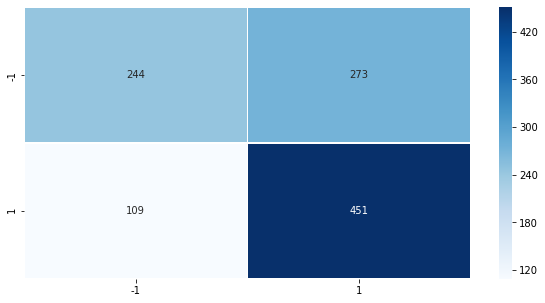

In [73]:
cf_matrix = confusion_matrix(y_test,predicted)

fig = plt.figure(figsize=(10, 5))
ax = sns.heatmap(cf_matrix, annot=True,fmt='g', linewidth=0.7, cmap='Blues', yticklabels=["-1","1"],xticklabels=["-1","1"] )
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top

plt.ylim(b, t) # update the ylim(bottom, top) values
ax.xaxis.set_label_position("top")
#fig.tight_layout()
plt.show()

In [57]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.5825603  0.56029685 0.63079777 0.56586271 0.57328386 0.67903525
 0.64564007 0.62639405 0.60893855 0.67597765]
0.6148787062067308


C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Trading Strategy Using the signal and PnL

In [82]:
Logistic_Regression_df['Predicted_Signal'] = model.predict(X)
Logistic_Regression_df['Nikkei_Returns'] = np.log(Logistic_Regression_df['Nikkei']/Logistic_Regression_df['Nikkei'].shift(1))
Cumulative_Nikkei_Returns = np.cumsum(Logistic_Regression_df[split:]['Nikkei_Returns'])


Logistic_Regression_df['Strategy_Returns'] = Logistic_Regression_df['Nikkei_Returns'] * Logistic_Regression_df['Predicted_Signal'].shift(1)
Cumulative_Strategy_Returns = np.cumsum(Logistic_Regression_df[split:]['Strategy_Returns'])

## Visualizing the returns (Model vs Actual)

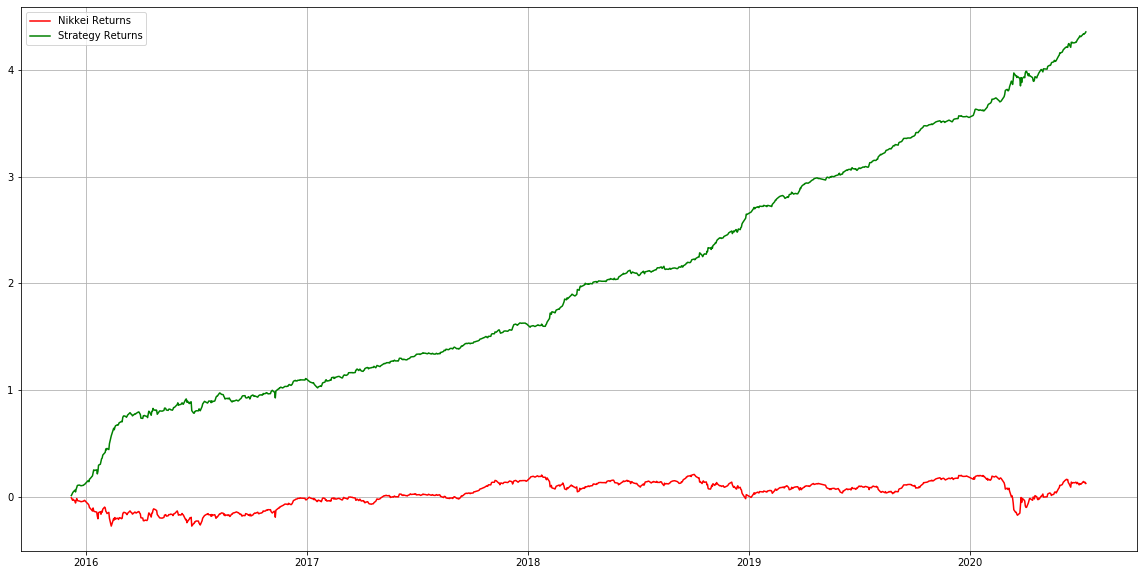

In [59]:
plt.figure(figsize = (20,10))

plt.plot(Cumulative_Nikkei_Returns, color='r',label = 'Nikkei Returns')
plt.plot(Cumulative_Strategy_Returns, color='g', label = 'Strategy Returns')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
Logistic_Regression_df

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open,Predicted_Signal,Nikkei_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,
1997-09-09,943.50,944.00,0.000,0.000000,0.000000,6.34,18695.97,23.89,119.05,0.00,0.00,1,NaN,NaN
1997-09-10,942.75,925.00,0.000,0.000000,0.000000,6.37,18704.77,24.64,119.26,-1.25,-0.75,-1,0.000471,0.000471
1997-09-11,924.00,918.25,0.000,0.000000,0.000000,6.39,18282.23,25.99,119.58,-1.00,-18.75,1,-0.022849,0.022849
1997-09-12,918.00,933.75,0.000,0.000000,0.000000,6.29,17965.80,25.17,120.93,-0.25,-6.00,1,-0.017460,-0.017460
1997-09-16,931.25,956.00,0.000,0.000000,0.000000,6.11,17974.50,23.77,121.10,-2.50,13.25,1,0.000484,0.000484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.69,22714.44,27.94,107.50,0.00,23.00,1,0.025346,0.025346
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,0.65,22614.69,29.43,107.53,-0.50,43.00,-1,-0.004401,-0.004401
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,0.67,22438.65,28.08,107.39,-0.25,-33.50,1,-0.007815,0.007815


In [44]:
Logistic_Regression_df

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open,Predicted_Signal,Nikkei_Returns,Strategy_Returns
Date,,,,,,,,,,,,,,
1997-09-09,943.50,944.00,0.000,0.000000,0.000000,6.34,18695.97,23.89,119.05,0.00,0.00,1,NaN,NaN
1997-09-10,942.75,925.00,0.000,0.000000,0.000000,6.37,18704.77,24.64,119.26,-1.25,-0.75,-1,0.000471,0.000471
1997-09-11,924.00,918.25,0.000,0.000000,0.000000,6.39,18282.23,25.99,119.58,-1.00,-18.75,1,-0.022849,0.022849
1997-09-12,918.00,933.75,0.000,0.000000,0.000000,6.29,17965.80,25.17,120.93,-0.25,-6.00,1,-0.017460,-0.017460
1997-09-16,931.25,956.00,0.000,0.000000,0.000000,6.11,17974.50,23.77,121.10,-2.50,13.25,1,0.000484,0.000484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.69,22714.44,27.94,107.50,0.00,23.00,1,0.025346,0.025346
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,0.65,22614.69,29.43,107.53,-0.50,43.00,-1,-0.004401,-0.004401
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,0.67,22438.65,28.08,107.39,-0.25,-33.50,1,-0.007815,0.007815


In [74]:
Logistic_Regression_df.to_csv('logistic_regression_best_df.csv')

In [78]:
X_train

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open
Date,,,,,,,,,,,
1997-09-09,943.50,944.00,0.000,0.000000,0.000000,6.34,18695.97,23.89,119.05,0.00,0.00
1997-09-10,942.75,925.00,0.000,0.000000,0.000000,6.37,18704.77,24.64,119.26,-1.25,-0.75
1997-09-11,924.00,918.25,0.000,0.000000,0.000000,6.39,18282.23,25.99,119.58,-1.00,-18.75
1997-09-12,918.00,933.75,0.000,0.000000,0.000000,6.29,17965.80,25.17,120.93,-0.25,-6.00
1997-09-16,931.25,956.00,0.000,0.000000,0.000000,6.11,17974.50,23.77,121.10,-2.50,13.25
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-01,2078.25,2092.25,2075.500,7.940387,0.407028,2.15,20012.40,14.67,122.88,0.25,-4.50
2015-12-02,2074.50,2076.25,2078.875,9.425789,0.444718,2.18,19938.13,15.91,123.52,-17.75,-3.75
2015-12-03,2076.50,2046.75,2076.400,9.695637,-0.211411,2.33,19939.90,18.11,123.06,0.25,2.00


In [79]:
X_test

,Open,Close,10day_MA,10day_Vol,10day_Correl,10Year,Nikkei,VIX,USDJPY,Open-Close,Open-Open
Date,,,,,,,,,,,
2015-12-08,2072.25,2052.75,2074.175,14.106892,-0.253601,2.24,19492.60,17.60,123.00,-1.50,-12.25
2015-12-09,2051.75,2037.00,2070.225,14.450697,-0.147062,2.22,19301.07,19.61,121.86,-1.00,-20.50
2015-12-10,2037.25,2042.75,2066.425,14.515259,0.188645,2.24,19046.55,19.34,121.44,0.25,-14.50
2015-12-11,2042.50,1998.75,2057.975,17.451511,0.812994,2.13,19230.48,24.39,120.94,-0.25,5.25
2015-12-14,2001.50,2011.50,2051.325,18.234049,0.865768,2.23,18883.42,22.73,120.57,2.75,-41.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,3115.25,3158.75,3077.425,22.223635,0.211815,0.69,22714.44,27.94,107.50,0.00,23.00
2020-07-07,3158.25,3125.00,3079.825,22.335389,0.219537,0.65,22614.69,29.43,107.53,-0.50,43.00
2020-07-08,3124.75,3154.50,3085.000,22.748669,0.389943,0.67,22438.65,28.08,107.39,-0.25,-33.50
